In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc # unless you prefer xarray
import datetime as dt
import os
import glob
import cmocean

from IPython.display import Markdown, display
%matplotlib inline

### Load a file from the 201905 hindcast

In [2]:
f0=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_may_climate_2007_2019_grid_T.nc')

In [3]:
f1=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201005_201005_grid_T.nc')

In [4]:
f2=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201105_201105_grid_T.nc')

In [5]:
f3=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201205_201205_grid_T.nc')

In [6]:
f4=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201305_201305_grid_T.nc')

In [7]:
f5=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201405_201405_grid_T.nc')

In [8]:
f6=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201505_201505_grid_T.nc')

In [9]:
f7=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201605_201605_grid_T.nc')

In [10]:
f8=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201705_201705_grid_T.nc')

In [11]:
f9=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201805_201805_grid_T.nc')

In [12]:
f10=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201905_201905_grid_T.nc')

In [13]:
print(f0.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'sossheig', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'votemper', 'vosaline'])


In [14]:
fe3t0=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_may_climate_2007_2019_carp_T.nc')

In [15]:
fe3t1=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201005_201005_carp_T.nc')

In [16]:
fe3t2=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201105_201105_carp_T.nc')

In [17]:
fe3t3=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201205_201205_carp_T.nc')

In [18]:
fe3t4=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201305_201305_carp_T.nc')

In [19]:
fe3t5=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201405_201405_carp_T.nc')

In [20]:
fe3t6=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201505_201505_carp_T.nc')

In [21]:
fe3t7=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201605_201605_carp_T.nc')

In [22]:
fe3t8=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201705_201705_carp_T.nc')

In [23]:
fe3t9=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201805_201805_carp_T.nc')

In [24]:
fe3t10=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201905_201905_carp_T.nc')

In [25]:
# return times as datetime objects:
torig=dt.datetime.strptime(f0.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
print(torig)
times=np.array([torig + dt.timedelta(seconds=ii) for ii in f0.variables['time_centered'][:]])

1900-01-01 00:00:00


In [26]:
# load model mesh
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as fm:
    print(fm.variables.keys())
    tmask=fm.variables['tmask'][:,:,:,:]
    navlon=fm.variables['nav_lon'][:,:]
    navlat=fm.variables['nav_lat'][:,:]

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])


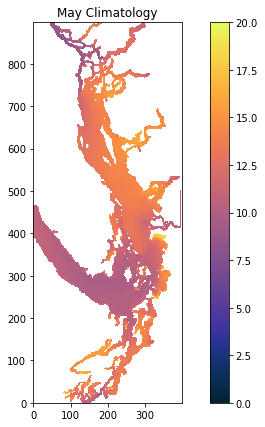

In [27]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0

fig,ax=plt.subplots(1,1,figsize=(10,7))
#fig.suptitle('Annual Anomalies Mesozoop Feeding on Diatoms', fontsize=16)
m0=ax.pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f0.variables['votemper'][il,0,:,:]),cmap='cmo.thermal',vmin=0,vmax=20)
viz_tools.set_aspect(ax,coords='grid')
ax.set_title('May Climatology')
fig.colorbar(m0,ax=ax)




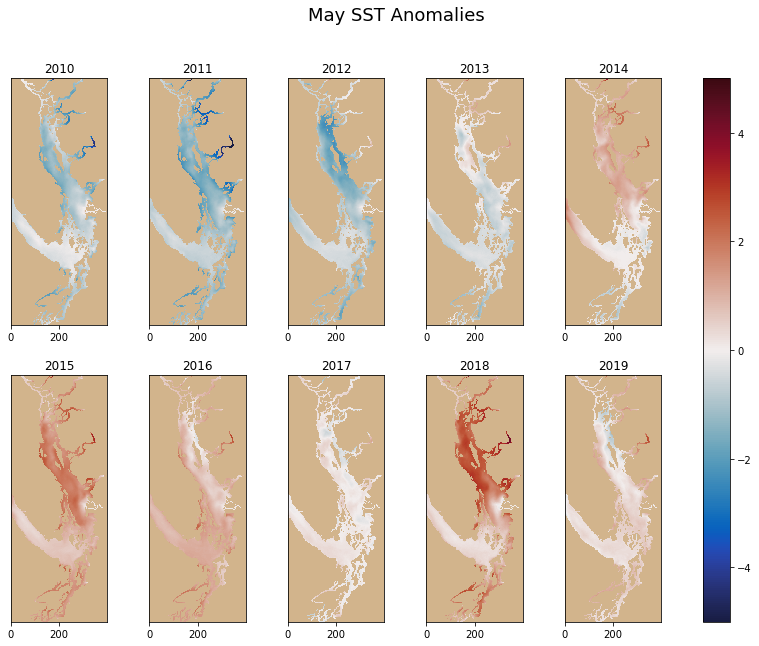

In [28]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
vmin=-5
vmax=5

fig,ax=plt.subplots(2,5,figsize=(15,10))
fig.suptitle('May SST Anomalies', fontsize=18)


m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(f1.variables['votemper'][il,0,:,:]-f0.variables['votemper'][il,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('2010')
ax[0,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[0,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(f2.variables['votemper'][il,0,:,:]-f0.variables['votemper'][il,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('2011')
ax[0,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[0,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(f3.variables['votemper'][il,0,:,:]-f0.variables['votemper'][il,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('2012')
ax[0,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[0,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(f4.variables['votemper'][il,0,:,:]-f0.variables['votemper'][il,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,3],coords='grid')
ax[0,3].set_title('2013')
ax[0,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[0,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(f5.variables['votemper'][il,0,:,:]-f0.variables['votemper'][il,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,4],coords='grid')
ax[0,4].set_title('2014')
ax[0,4].yaxis.set_visible(False)


##row 2
m0=ax[1,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(f6.variables['votemper'][il,0,:,:]-f0.variables['votemper'][il,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('2015')
ax[1,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[1,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(f7.variables['votemper'][il,0,:,:]-f0.variables['votemper'][il,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('2016')
ax[1,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[1,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(f8.variables['votemper'][il,0,:,:]-f0.variables['votemper'][il,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('2017')
ax[1,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[1,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(f9.variables['votemper'][il,0,:,:]-f0.variables['votemper'][il,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,3],coords='grid')
ax[1,3].set_title('2018')
ax[1,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[1,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(f10.variables['votemper'][il,0,:,:]-f0.variables['votemper'][il,0,:,:])),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,4],coords='grid')
ax[1,4].set_title('2019')
ax[1,4].yaxis.set_visible(False)


fig.colorbar(m0,ax=ax)

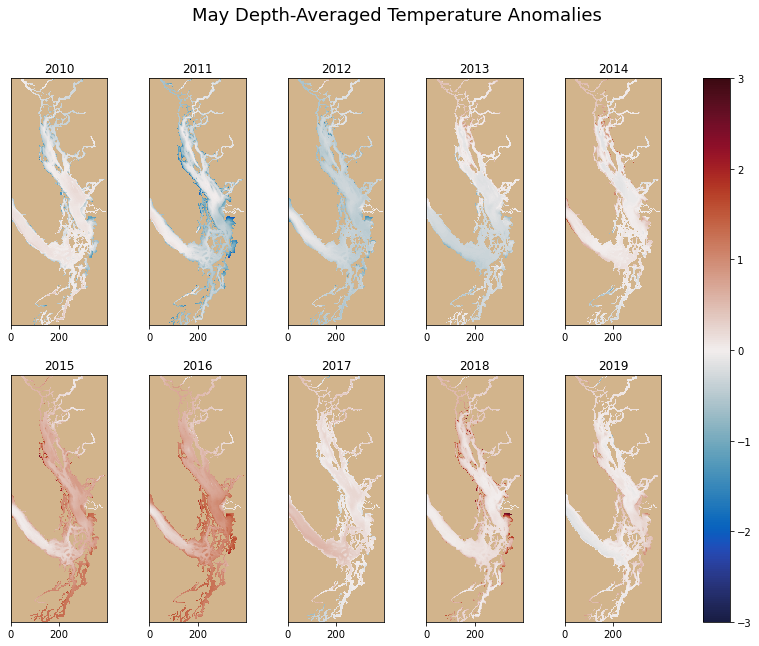

In [45]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
vmin=-3
vmax=3

fig,ax=plt.subplots(2,5,figsize=(15,10))
fig.suptitle('May Depth-Averaged Temperature Anomalies', fontsize=18)

intuz0=np.sum(f0.variables['votemper'][il,:,:,:]*fe3t0.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz0=intuz0/np.sum(fe3t0.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)

intuz1=np.sum(f1.variables['votemper'][il,:,:,:]*fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz1=intuz1/np.sum(fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz1-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('2010')
ax[0,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

intuz2=np.sum(f2.variables['votemper'][il,:,:,:]*fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz2=intuz2/np.sum(fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[0,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz2-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('2011')
ax[0,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

intuz3=np.sum(f3.variables['votemper'][il,:,:,:]*fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz3=intuz3/np.sum(fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[0,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz3-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('2012')
ax[0,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

intuz4=np.sum(f4.variables['votemper'][il,:,:,:]*fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz4=intuz4/np.sum(fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[0,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz4-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,3],coords='grid')
ax[0,3].set_title('2013')
ax[0,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

intuz5=np.sum(f5.variables['votemper'][il,:,:,:]*fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz5=intuz5/np.sum(fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[0,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz5-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,4],coords='grid')
ax[0,4].set_title('2014')
ax[0,4].yaxis.set_visible(False)


##row 2
intuz6=np.sum(f6.variables['votemper'][il,:,:,:]*fe3t6.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz6=intuz6/np.sum(fe3t6.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[1,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz6-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('2015')
ax[1,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

intuz7=np.sum(f7.variables['votemper'][il,:,:,:]*fe3t7.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz7=intuz7/np.sum(fe3t7.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[1,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz7-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('2016')
ax[1,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

intuz8=np.sum(f8.variables['votemper'][il,:,:,:]*fe3t8.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz8=intuz8/np.sum(fe3t8.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[1,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz8-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('2017')
ax[1,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

intuz9=np.sum(f9.variables['votemper'][il,:,:,:]*fe3t9.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz9=intuz9/np.sum(fe3t9.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[1,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz9-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,3],coords='grid')
ax[1,3].set_title('2018')
ax[1,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

intuz10=np.sum(f10.variables['votemper'][il,:,:,:]*fe3t10.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz10=intuz10/np.sum(fe3t10.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[1,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz10-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,4],coords='grid')
ax[1,4].set_title('2019')
ax[1,4].yaxis.set_visible(False)


fig.colorbar(m0,ax=ax)

In [30]:
mes0=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_may_climate_2007_2019_ptrc_T.nc')

In [31]:
mes1=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201005_201005_ptrc_T.nc')

In [32]:
mes2=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201105_201105_ptrc_T.nc')

In [33]:
mes3=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201205_201205_ptrc_T.nc')

In [34]:
mes4=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201305_201305_ptrc_T.nc')

In [35]:
mes5=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201405_201405_ptrc_T.nc')

In [36]:
mes6=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201505_201505_ptrc_T.nc')

In [37]:
mes7=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201605_201605_ptrc_T.nc')

In [38]:
mes8=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201705_201705_ptrc_T.nc')

In [39]:
mes9=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201805_201805_ptrc_T.nc')

In [40]:
mes10=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201905_201905_ptrc_T.nc')

In [41]:
#Tdep0=np.sum((mes0.variables['mesozooplankton'][il,:,:,:]*np.exp(.07*(f0.variables['votemper'][il,:,:,:]-20)),0)/mes0.variables['mesozooplankton'][il,:,:,:],0)


intuz0=np.sum(np.exp(0.07*(f0.variables['votemper'][il,:,:,:]-20))*fe3t0.variables['e3t'][il,:,:,:]*mes0.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz0=intuz0/np.sum(fe3t0.variables['e3t'][il,:,:,:]*mes0.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)

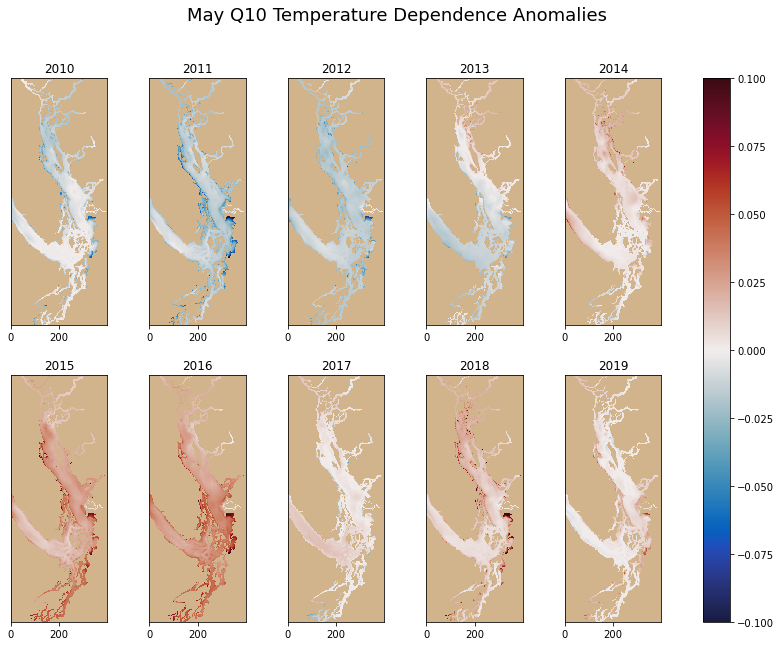

In [42]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
vmin=-.1
vmax=.1

fig,ax=plt.subplots(2,5,figsize=(15,10))
fig.suptitle('May Q10 Temperature Dependence Anomalies', fontsize=18)

intuz0=np.sum(np.exp(0.07*(f0.variables['votemper'][il,:,:,:]-20))*fe3t0.variables['e3t'][il,:,:,:]*mes0.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz0=intuz0/np.sum(fe3t0.variables['e3t'][il,:,:,:]*mes0.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)

intuz1=np.sum(np.exp(0.07*(f1.variables['votemper'][il,:,:,:]-20))*fe3t1.variables['e3t'][il,:,:,:]*mes1.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz1=intuz1/np.sum(fe3t1.variables['e3t'][il,:,:,:]*mes1.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz1-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('2010')
ax[0,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

intuz2=np.sum(np.exp(0.07*(f2.variables['votemper'][il,:,:,:]-20))*fe3t2.variables['e3t'][il,:,:,:]*mes2.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz2=intuz2/np.sum(fe3t2.variables['e3t'][il,:,:,:]*mes2.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[0,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz2-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('2011')
ax[0,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

intuz3=np.sum(np.exp(0.07*(f3.variables['votemper'][il,:,:,:]-20))*fe3t3.variables['e3t'][il,:,:,:]*mes3.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz3=intuz3/np.sum(fe3t3.variables['e3t'][il,:,:,:]*mes3.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[0,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz3-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('2012')
ax[0,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

intuz4=np.sum(np.exp(0.07*(f4.variables['votemper'][il,:,:,:]-20))*fe3t4.variables['e3t'][il,:,:,:]*mes4.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz4=intuz4/np.sum(fe3t4.variables['e3t'][il,:,:,:]*mes4.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[0,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz4-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,3],coords='grid')
ax[0,3].set_title('2013')
ax[0,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

intuz5=np.sum(np.exp(0.07*(f5.variables['votemper'][il,:,:,:]-20))*fe3t5.variables['e3t'][il,:,:,:]*mes5.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz5=intuz5/np.sum(fe3t5.variables['e3t'][il,:,:,:]*mes5.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[0,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz5-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,4],coords='grid')
ax[0,4].set_title('2014')
ax[0,4].yaxis.set_visible(False)


##row 2
intuz6=np.sum(np.exp(0.07*(f6.variables['votemper'][il,:,:,:]-20))*fe3t6.variables['e3t'][il,:,:,:]*mes6.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz6=intuz6/np.sum(fe3t6.variables['e3t'][il,:,:,:]*mes6.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[1,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz6-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('2015')
ax[1,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

intuz7=np.sum(np.exp(0.07*(f7.variables['votemper'][il,:,:,:]-20))*fe3t7.variables['e3t'][il,:,:,:]*mes7.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz7=intuz7/np.sum(fe3t7.variables['e3t'][il,:,:,:]*mes7.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[1,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz7-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('2016')
ax[1,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

intuz8=np.sum(np.exp(0.07*(f8.variables['votemper'][il,:,:,:]-20))*fe3t8.variables['e3t'][il,:,:,:]*mes8.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz8=intuz8/np.sum(fe3t8.variables['e3t'][il,:,:,:]*mes8.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[1,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz8-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('2017')
ax[1,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

intuz9=np.sum(np.exp(0.07*(f9.variables['votemper'][il,:,:,:]-20))*fe3t9.variables['e3t'][il,:,:,:]*mes9.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz9=intuz9/np.sum(fe3t9.variables['e3t'][il,:,:,:]*mes9.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[1,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz9-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,3],coords='grid')
ax[1,3].set_title('2018')
ax[1,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

intuz10=np.sum(np.exp(0.07*(f10.variables['votemper'][il,:,:,:]-20))*fe3t10.variables['e3t'][il,:,:,:]*mes10.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz10=intuz10/np.sum(fe3t10.variables['e3t'][il,:,:,:]*mes10.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[1,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz10-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,4],coords='grid')
ax[1,4].set_title('2019')
ax[1,4].yaxis.set_visible(False)


fig.colorbar(m0,ax=ax)

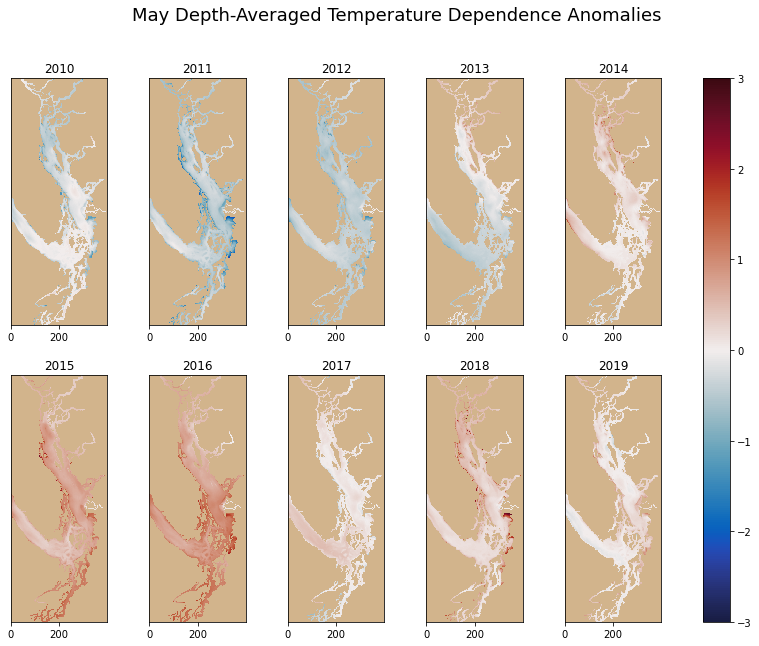

In [44]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
vmin=-3
vmax=3

fig,ax=plt.subplots(2,5,figsize=(15,10))
fig.suptitle('May Depth-Averaged Temperature Dependence Anomalies', fontsize=18)

intuz0=np.sum((f0.variables['votemper'][il,:,:,:])*fe3t0.variables['e3t'][il,:,:,:]*mes0.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz0=intuz0/np.sum(fe3t0.variables['e3t'][il,:,:,:]*mes0.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)

intuz1=np.sum((f1.variables['votemper'][il,:,:,:])*fe3t1.variables['e3t'][il,:,:,:]*mes1.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz1=intuz1/np.sum(fe3t1.variables['e3t'][il,:,:,:]*mes1.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz1-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('2010')
ax[0,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

intuz2=np.sum((f2.variables['votemper'][il,:,:,:])*fe3t2.variables['e3t'][il,:,:,:]*mes2.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz2=intuz2/np.sum(fe3t2.variables['e3t'][il,:,:,:]*mes2.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[0,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz2-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('2011')
ax[0,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

intuz3=np.sum((f3.variables['votemper'][il,:,:,:])*fe3t3.variables['e3t'][il,:,:,:]*mes3.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz3=intuz3/np.sum(fe3t3.variables['e3t'][il,:,:,:]*mes3.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[0,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz3-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('2012')
ax[0,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

intuz4=np.sum((f4.variables['votemper'][il,:,:,:])*fe3t4.variables['e3t'][il,:,:,:]*mes4.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz4=intuz4/np.sum(fe3t4.variables['e3t'][il,:,:,:]*mes4.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[0,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz4-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,3],coords='grid')
ax[0,3].set_title('2013')
ax[0,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

intuz5=np.sum((f5.variables['votemper'][il,:,:,:])*fe3t5.variables['e3t'][il,:,:,:]*mes5.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz5=intuz5/np.sum(fe3t5.variables['e3t'][il,:,:,:]*mes5.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[0,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz5-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,4],coords='grid')
ax[0,4].set_title('2014')
ax[0,4].yaxis.set_visible(False)


##row 2
intuz6=np.sum((f6.variables['votemper'][il,:,:,:])*fe3t6.variables['e3t'][il,:,:,:]*mes6.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz6=intuz6/np.sum(fe3t6.variables['e3t'][il,:,:,:]*mes6.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[1,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz6-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('2015')
ax[1,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

intuz7=np.sum((f7.variables['votemper'][il,:,:,:])*fe3t7.variables['e3t'][il,:,:,:]*mes7.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz7=intuz7/np.sum(fe3t7.variables['e3t'][il,:,:,:]*mes7.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[1,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz7-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('2016')
ax[1,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

intuz8=np.sum((f8.variables['votemper'][il,:,:,:])*fe3t8.variables['e3t'][il,:,:,:]*mes8.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz8=intuz8/np.sum(fe3t8.variables['e3t'][il,:,:,:]*mes8.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[1,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz8-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('2017')
ax[1,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

intuz9=np.sum((f9.variables['votemper'][il,:,:,:])*fe3t9.variables['e3t'][il,:,:,:]*mes9.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz9=intuz9/np.sum(fe3t9.variables['e3t'][il,:,:,:]*mes9.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[1,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz9-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,3],coords='grid')
ax[1,3].set_title('2018')
ax[1,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

intuz10=np.sum((f10.variables['votemper'][il,:,:,:])*fe3t2.variables['e3t'][il,:,:,:]*mes10.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
avguz10=intuz10/np.sum(fe3t2.variables['e3t'][il,:,:,:]*mes10.variables['mesozooplankton'][il,:,:,:]*tmask[0,:,:,:],0)
m0=ax[1,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(avguz10-avguz0)),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,4],coords='grid')
ax[1,4].set_title('2019')
ax[1,4].yaxis.set_visible(False)


fig.colorbar(m0,ax=ax)

In [44]:
f0.close()
fe3t0.close()
mes0.close()

In [45]:
f1.close()
fe3t1.close()
mes1.close()

In [46]:
f2.close()
fe3t2.close()
mes2.close()

In [47]:
f3.close()
fe3t3.close()
mes3.close()

In [48]:
f4.close()
fe3t4.close()
mes4.close()

In [49]:
f5.close()
fe3t5.close()
mes5.close()

In [50]:
f6.close()
fe3t6.close()
mes6.close()

In [51]:
f7.close()
fe3t7.close()
mes7.close()

In [52]:
f8.close()
fe3t8.close()
mes8.close()

In [53]:
f9.close()
fe3t9.close()
mes9.close()

In [54]:
f10.close()
fe3t10.close()
mes10.close()